In [1]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google'

In [2]:
from sqlite3 import connect
from pandas import read_sql_query
import pandas as pd # Import pandas and give it the alias 'pd'

In [3]:
# 1. Load your data
import sqlite3 # Import the sqlite3 module to interact with the database
conn = sqlite3.connect("/content/drive/MyDrive/capstone/northwind database.db") # Connect to the database
df = pd.read_sql_query("SELECT * FROM Customers", conn) # Read data from the 'Customers' table (replace with your actual table name)
conn.close() # Close the connection

OperationalError: unable to open database file

In [5]:
# Execute the query and load results into a DataFrame
# Change 'c.customer_id' to 'c.CustomerID' to match the actual column name
query = """
SELECT
    c.CustomerID,
    c.CompanyName,  -- Include company name for identification
    SUM(o.orderID) AS total_sales
FROM
    Customers c  -- Alias the Customers table as 'c'
JOIN
    Orders o ON c.CustomerID = o.CustomerID  -- Join Customers and Orders tables
GROUP BY
    c.CustomerID, c.CompanyName  -- Group by customer ID and company name
ORDER BY
    total_sales DESC
LIMIT 10;  -- Get the top 10 customers
"""

In [31]:
conn = sqlite3.connect("/content/drive/MyDrive/capstone/northwind database.db")
top_customer_generation = pd.read_sql_query(query, conn)
conn.close()
print(top_customer_generation)

  CustomerID                 CompanyName  total_sales
0      BSBEV               B's Beverages      3835329
1      RICAR          Ricardo Adocicados      3788109
2      LILAS           LILA-Supermercado      3716564
3      GOURL         Gourmet Lanchonetes      3703555
4      TORTU         Tortuga Restaurante      3696833
5      PRINI      Princesa Isabel Vinhos      3674042
6      FOLIG           Folies gourmandes      3673049
7      HUNGC  Hungry Coyote Import Store      3621566
8      LETSS           Let's Stop N Shop      3582442
9      RANCH               Rancho grande      3572259


In [32]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect("/content/drive/MyDrive/capstone/northwind database.db")

# Query to get order details with product names
query = """
SELECT
    o.OrderID,
    o.CustomerID,
    o.OrderDate,
    od.ProductID,
    od.UnitPrice,
    od.Quantity,
    od.Discount,
    p.ProductName
FROM Orders o
JOIN "Order Details" od ON o.OrderID = od.OrderID
JOIN Products p ON od.ProductID = p.ProductID;
"""


In [33]:
# Load data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)
# Use the active connection

# ( top 10 products by quantity sold)
top_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Close the connection after you're done with it
conn.close()  # Moved the connection closure to the end


ProductName
Louisiana Hot Spiced Okra          206213
Sir Rodney's Marmalade             205637
Teatime Chocolate Biscuits         205487
Sirop d'érable                     205005
Gumbär Gummibärchen                204761
Outback Lager                      204403
Ravioli Angelo                     204251
Raclette Courdavault               204137
Uncle Bob's Organic Dried Pears    203970
Sasquatch Ale                      203667
Name: Quantity, dtype: int64


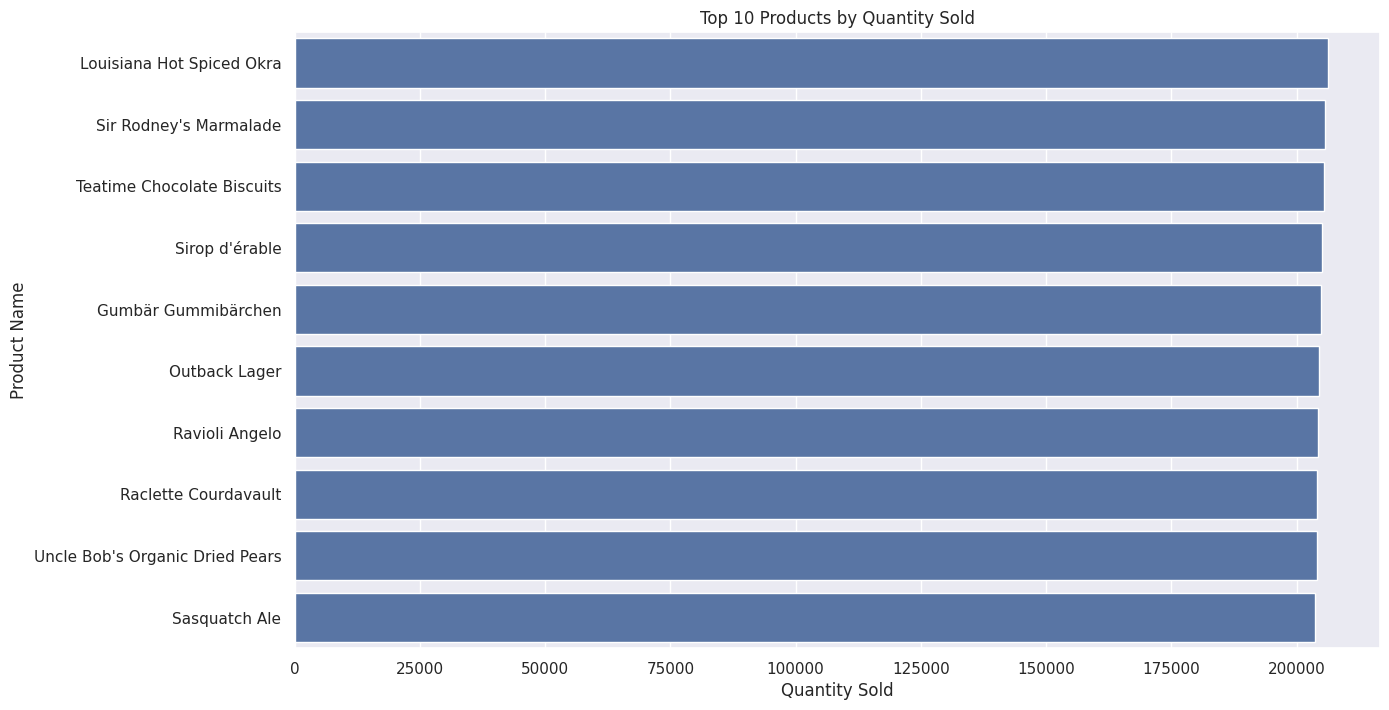

In [34]:
# Visualize top products
plt.figure(figsize=(14, 8))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

# Calculate the total sales per product

In [ ]:
product_sales = df.groupby('ProductName')['Quantity'].sum()
print(product_sales)

ProductName
Alice Mutton                       202304
Aniseed Syrup                      202186
Boston Crab Meat                   200232
Camembert Pierrot                  203154
Carnarvon Tigers                   201747
                                    ...  
Uncle Bob's Organic Dried Pears    203970
Valkoinen suklaa                   200622
Vegie-spread                       200764
Wimmers gute Semmelknödel          201245
Zaanse koeken                      197889
Name: Quantity, Length: 77, dtype: int64


# Product Performance: Analyze the performance of different products, including sales trends, profitability, and seasonal effects

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [43]:
# Connect to the database
conn = sqlite3.connect("/content/drive/MyDrive/capstone/northwind database.db")


cursor = conn.cursor()

cursor.execute('''
    SELECT
        p.ProductName,
        p.CategoryID,
        o.OrderID,
        o.OrderDate,
        o.Freight,
        od.UnitPrice,
        od.Quantity
    FROM
        Orders o
    JOIN
        "Order Details" od ON o.OrderID = od.OrderID
    JOIN
        Products p ON od.ProductID = p.ProductID
''')

data = cursor.fetchall()

In [46]:
# Convert data to Pandas DataFrame
df = pd.DataFrame(data, columns=['ProductName', 'CategoryID', 'OrderID', 'OrderDate', 'Freight', 'UnitPrice', 'Quantity'])

# Convert 'OrderDate' to datetime object, handling different formats
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Calculate sales revenue for each product
df['SalesRevenue'] = df['UnitPrice'] * df['Quantity']

# Calculate profit margin for each product
df['ProfitMargin'] = df['SalesRevenue'] * 0.2  # assume 20% profit margin

# Group by product and calculate sales trends
# Reset index before resampling so 'OrderDate' becomes a column again
product_sales = df.groupby('ProductName').resample('M', on='OrderDate')['SalesRevenue'].sum().reset_index()
print(product_sales)

         ProductName  OrderDate  SalesRevenue
0       Alice Mutton 2012-07-31       38727.0
1       Alice Mutton 2012-08-31       60060.0
2       Alice Mutton 2012-09-30       60762.0
3       Alice Mutton 2012-10-31       61035.0
4       Alice Mutton 2012-11-30       46098.0
...              ...        ...           ...
10467  Zaanse koeken 2023-06-30       15342.5
10468  Zaanse koeken 2023-07-31       14478.0
10469  Zaanse koeken 2023-08-31       13965.0
10470  Zaanse koeken 2023-09-30       12331.0
10471  Zaanse koeken 2023-10-31       10326.5

[10472 rows x 3 columns]


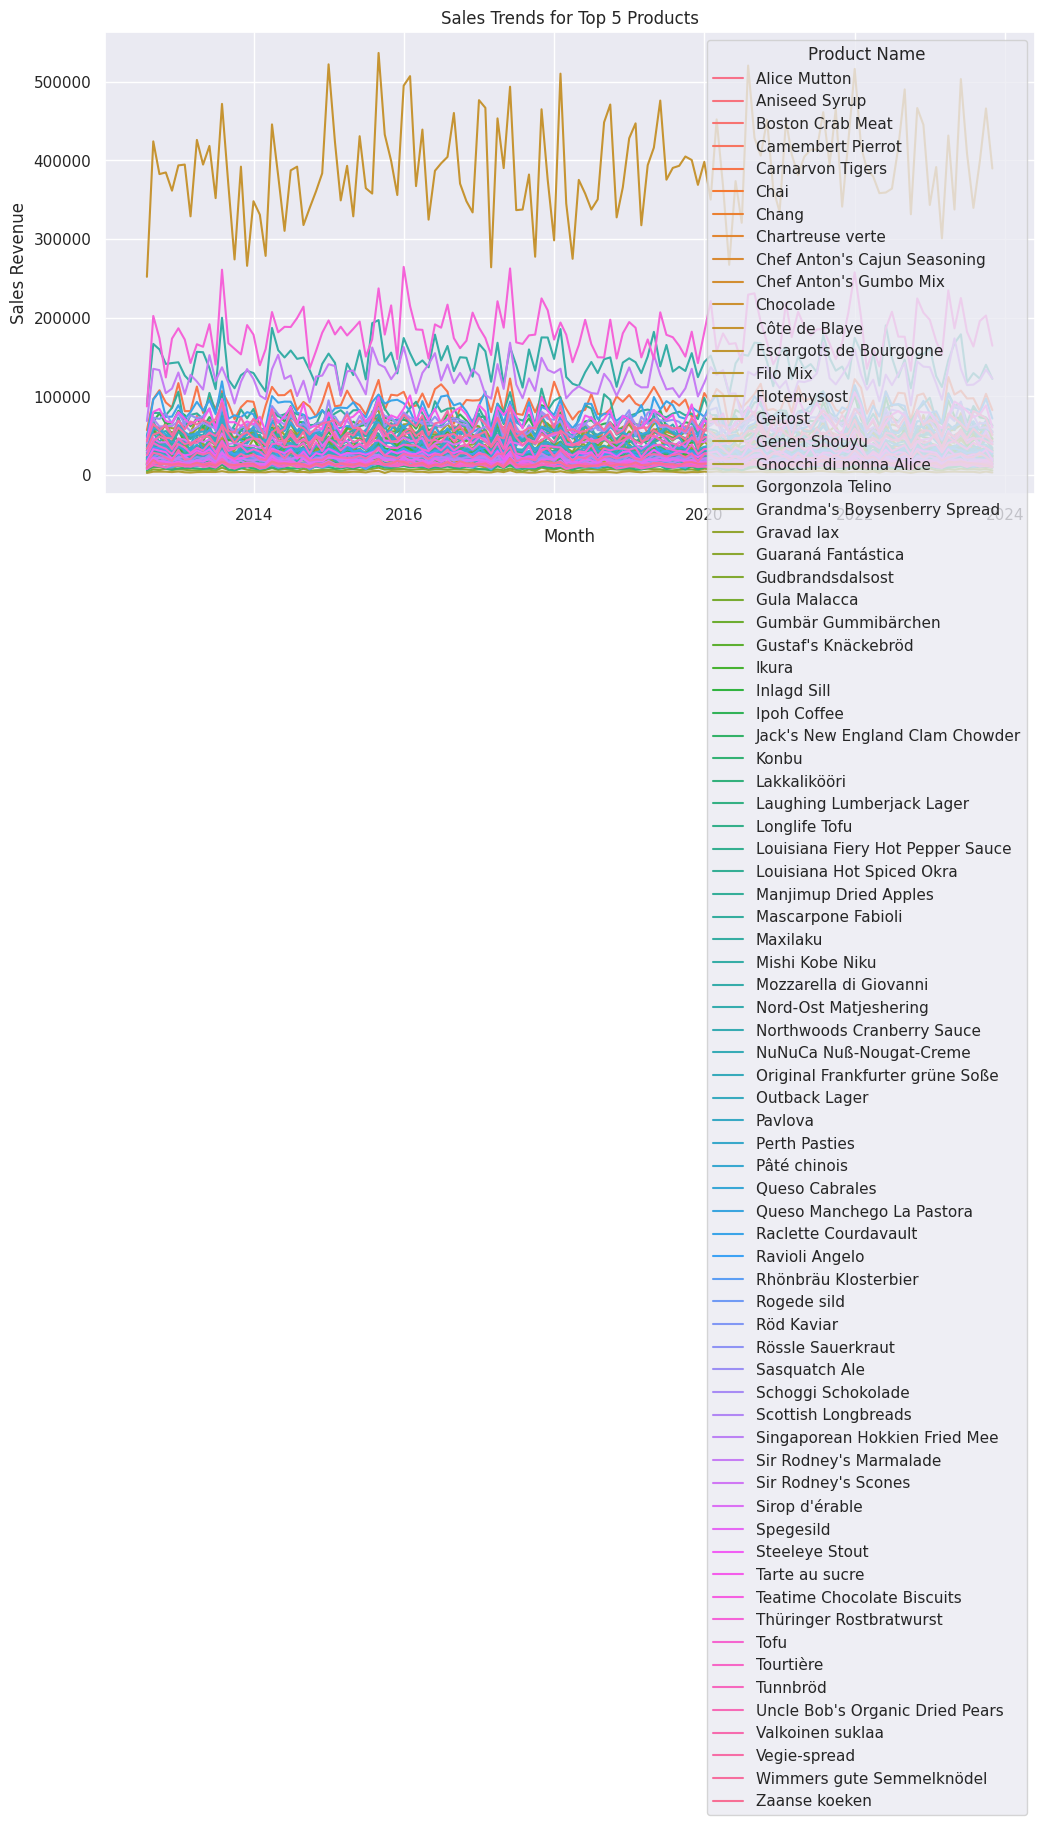

In [47]:
# Plot sales trends for top 5 products
sns.set()
plt.figure(figsize=(12, 6))
sns.lineplot(x=product_sales['OrderDate'], y=product_sales['SalesRevenue'], hue=product_sales['ProductName'])
plt.title('Sales Trends for Top 5 Products')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.legend(title='Product Name')
plt.show()

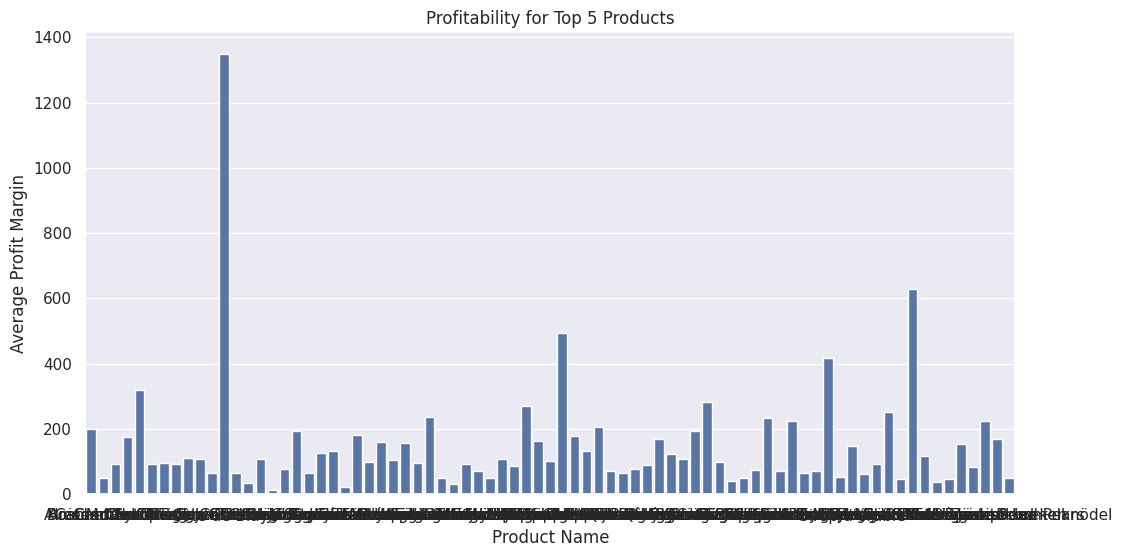

In [48]:
# Group by product and calculate profitability
product_profitability = df.groupby('ProductName')['ProfitMargin'].mean().reset_index()

# Plot profitability for top 5 products
sns.set()
plt.figure(figsize=(12, 6))
sns.barplot(x=product_profitability['ProductName'], y=product_profitability['ProfitMargin'])
plt.title('Profitability for Top 5 Products')
plt.xlabel('Product Name')
plt.ylabel('Average Profit Margin')
plt.show()

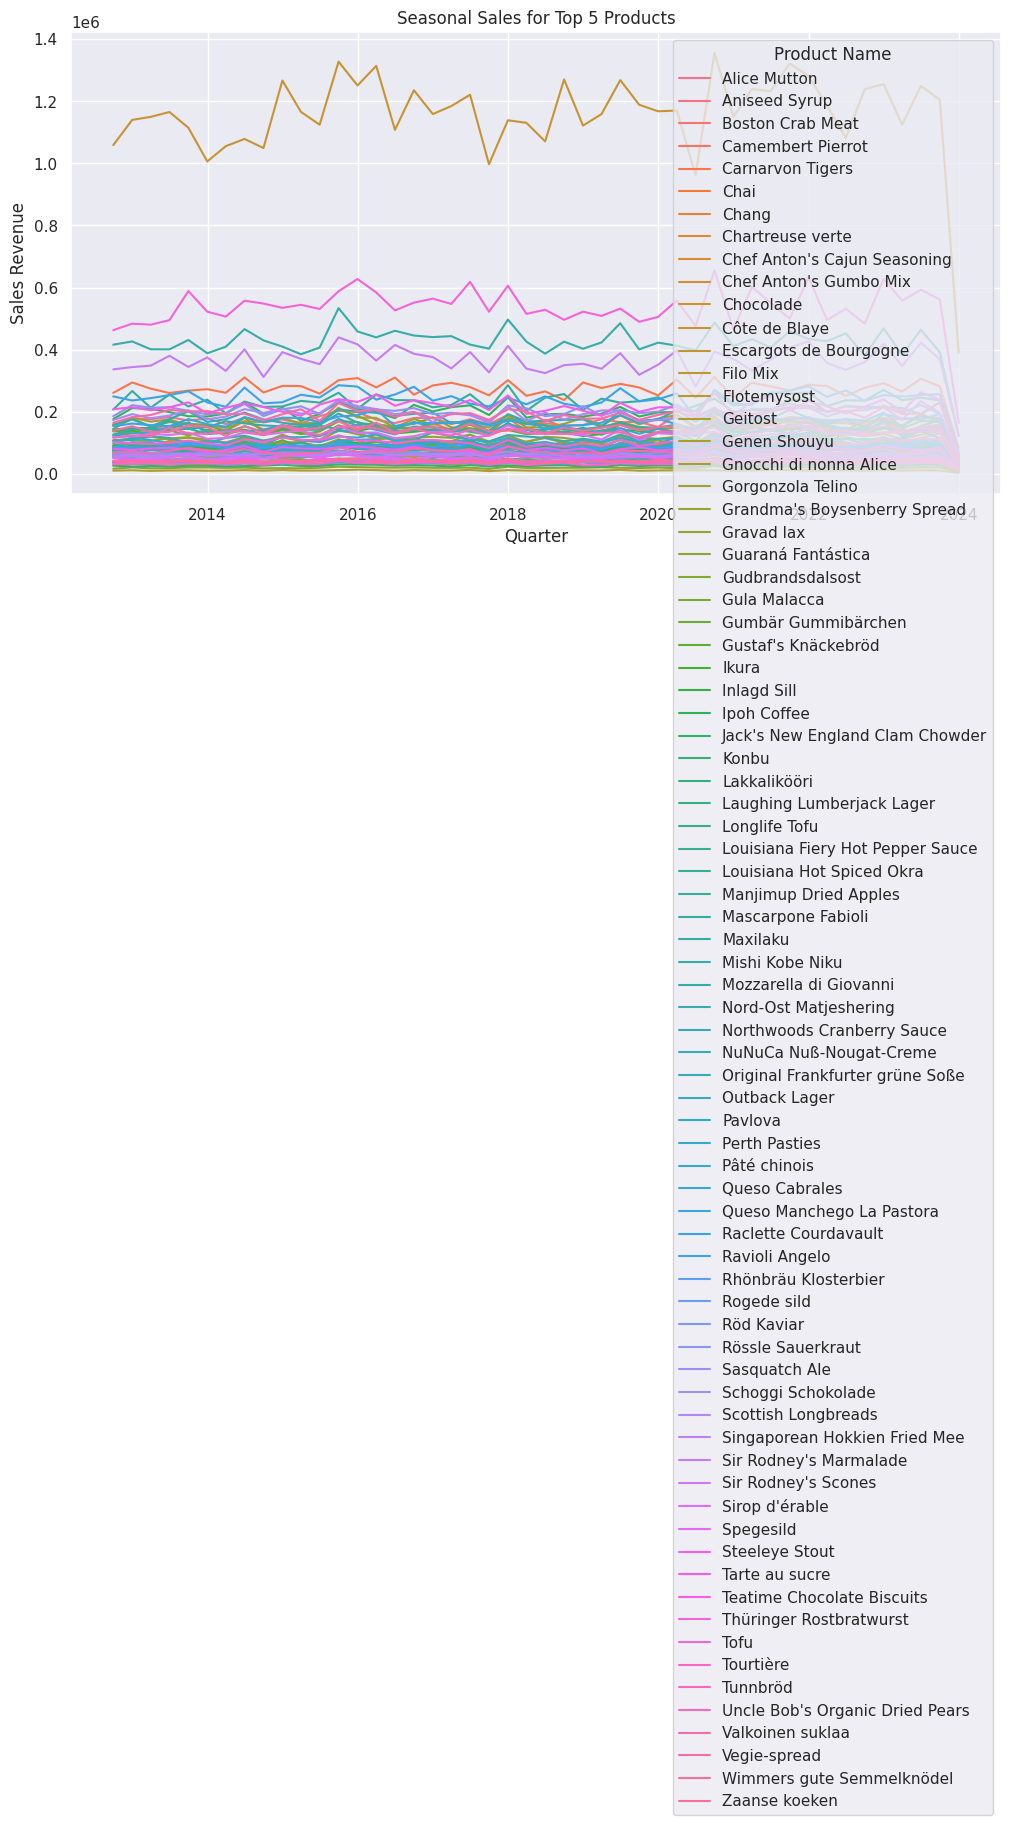

In [49]:
# Analyze seasonal effects on sales
seasonal_sales = df.groupby(['ProductName', pd.Grouper(key='OrderDate', freq='Q')])['SalesRevenue'].sum().reset_index()

# Plot seasonal sales for top 5 products
sns.set()
plt.figure(figsize=(12, 6))
sns.lineplot(x=seasonal_sales['OrderDate'], y=seasonal_sales['SalesRevenue'], hue=seasonal_sales['ProductName'])
plt.title('Seasonal Sales for Top 5 Products')
plt.xlabel('Quarter')
plt.ylabel('Sales Revenue')
plt.legend(title='Product Name')
plt.show()

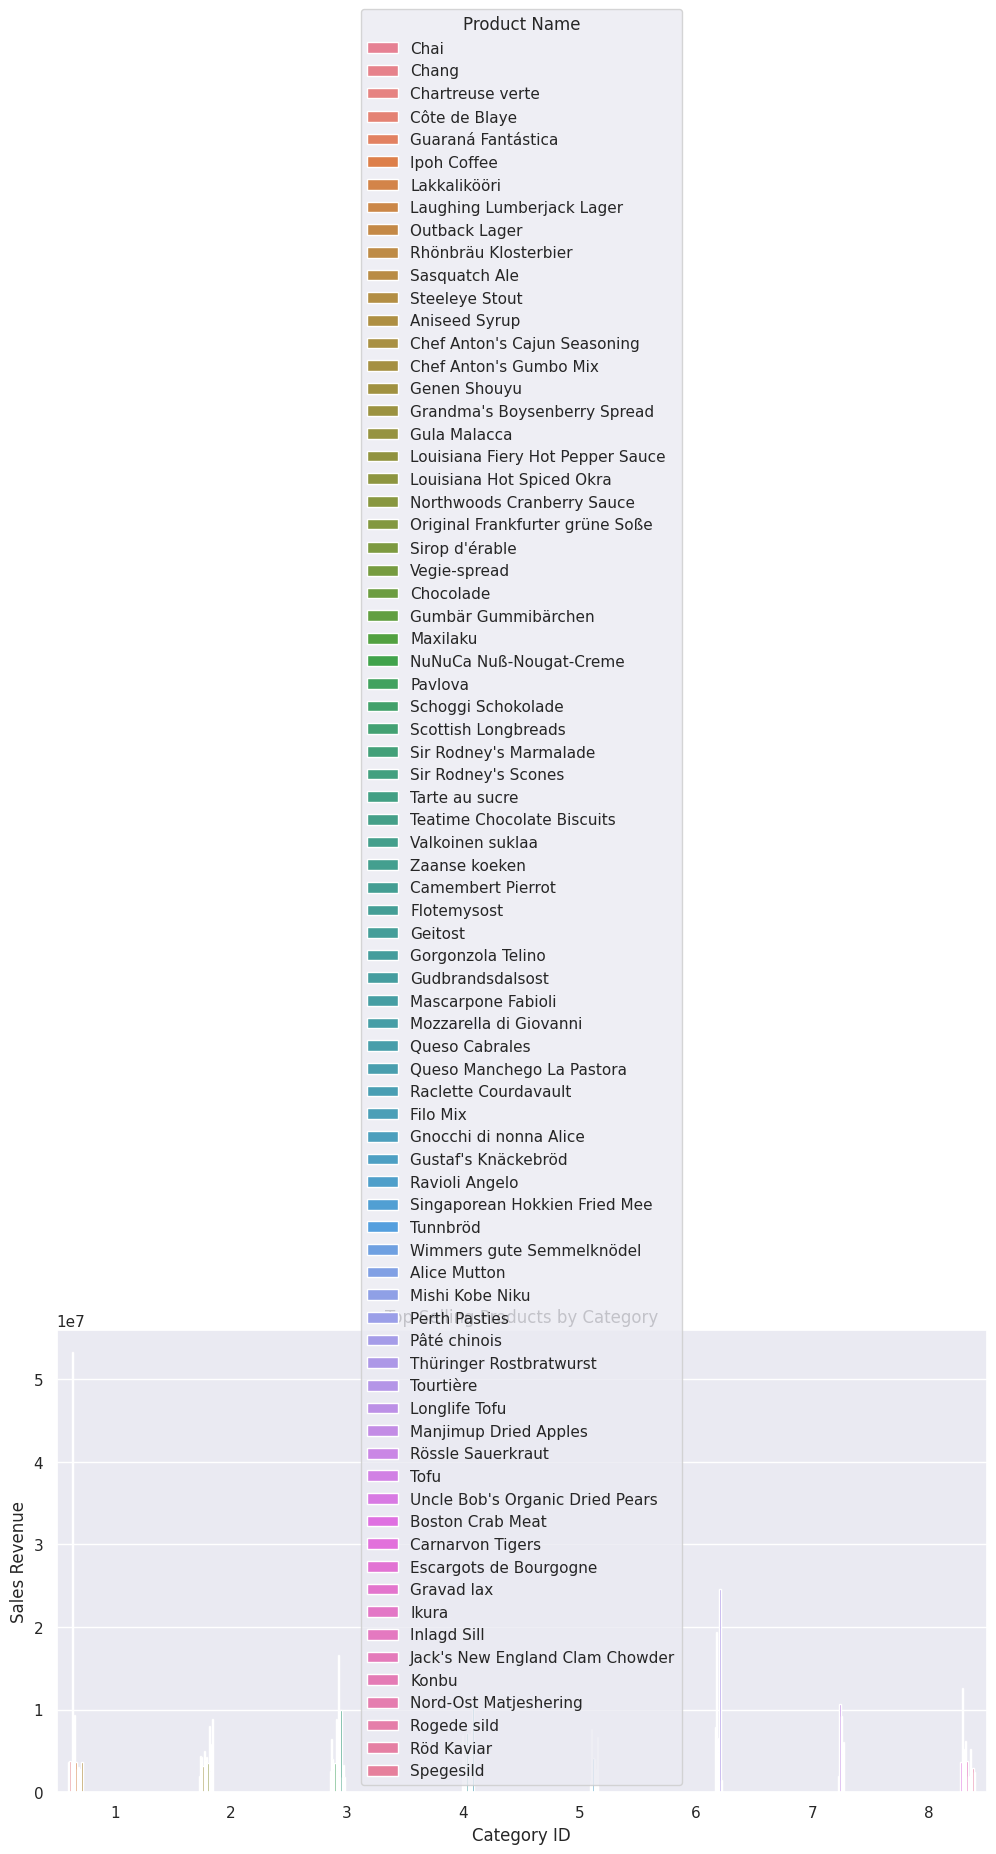

In [50]:
# Identify top-selling products by category
category_sales = df.groupby(['CategoryID', 'ProductName'])['SalesRevenue'].sum().reset_index()

# Plot top-selling products by category
sns.set()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales['CategoryID'], y=category_sales['SalesRevenue'], hue=category_sales['ProductName'])
plt.title('Top-Selling Products by Category')
plt.xlabel('Category ID')
plt.ylabel('Sales Revenue')
plt.legend(title='Product Name')
plt.show()

# Order Trends: Evaluate order trends over time, including the impact of promotions and external events.


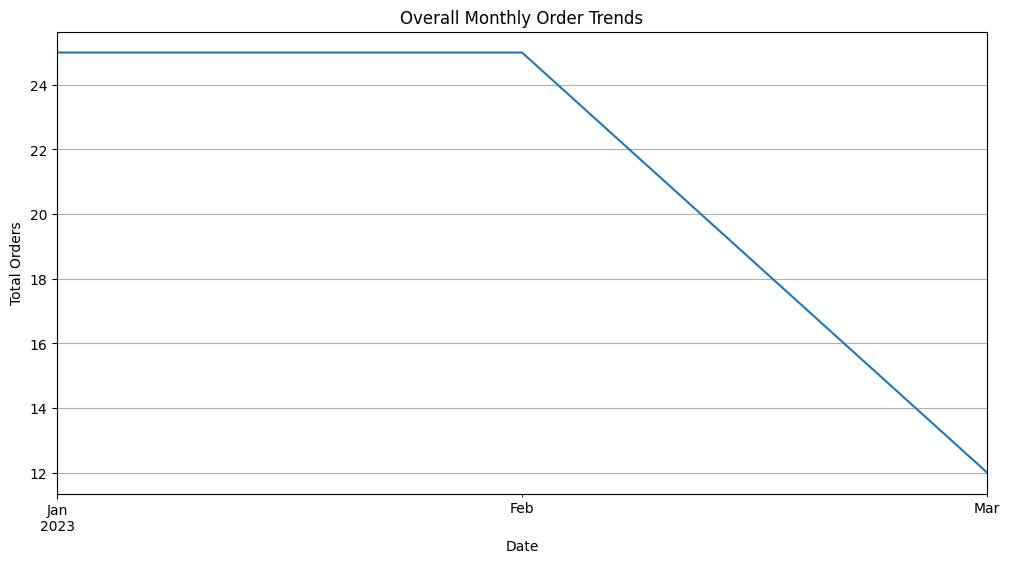

In [ ]:
# Overall Order Trends
df.resample('M')['Quantity'].sum().plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Orders')
plt.title('Overall Monthly Order Trends')
plt.grid(True)
plt.show()

In [ ]:
#  Impact of Promotions (if 'Promotion' column exists)
if 'Promotion' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Promotion', y='Quantity', data=df)
    plt.xlabel('Promotion Active')
    plt.ylabel('Order Quantity')
    plt.title('Impact of Promotions on Order Quantity')
    plt.grid(True)
    plt.show()

In [ ]:
#  Impact of External Events (if 'ExternalEvent' column exists)
if 'ExternalEvent' in df.columns:
    event_impact = df.groupby('ExternalEvent')['Quantity'].sum()
    plt.figure(figsize=(12, 6))
    event_impact.plot(kind='bar')
    plt.xlabel('External Event')
    plt.ylabel('Total Orders')
    plt.title('Impact of External Events on Orders')
    plt.grid(True)
    plt.show()

# Supplier Analysis: Assess the performance and reliability of suppliers based on delivery times, product quality, and order fulfillment rates.


In [ ]:
from sqlite3 import connect
from pandas import read_sql_query
import pandas as pd # Import pandas and give it the alias 'pd'


In [ ]:
# 1. Load your data
import sqlite3 # Import the sqlite3 module to interact with the database
conn = sqlite3.connect("/content/drive/MyDrive/capstone/northwind database.db") # Connect to the database
orders_df = pd.read_sql_query("SELECT * FROM Orders", conn)
products_df = pd.read_sql_query("SELECT * FROM Products", conn)
suppliers_df = pd.read_sql_query("SELECT * FROM Suppliers", conn) # Close the connection

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named orders_df

delivery_times_df = orders_df.copy()

# Convert 'ShippedDate' and 'RequiredDate' columns to datetime objects
delivery_times_df['ShippedDate'] = pd.to_datetime(delivery_times_df['ShippedDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce') # Include time format
delivery_times_df['RequiredDate'] = pd.to_datetime(delivery_times_df['RequiredDate'], format='%Y-%m-%d', errors='coerce')

# Check for any errors in the conversion
errors_in_shipped_date = delivery_times_df['ShippedDate'][delivery_times_df['ShippedDate'].isnull()]
errors_in_required_date = delivery_times_df['RequiredDate'][delivery_times_df['RequiredDate'].isnull()]

# Now calculate the difference in days
delivery_times_df['DeliveryTimeDays'] = (delivery_times_df['ShippedDate'] - delivery_times_df['RequiredDate']).dt.days

delivery_times_df.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,DeliveryTimeDays
0,10248,VINET,5,2016-07-04,2016-08-01,NaT,3,16.75,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,Western Europe,51100,France,NaN
1,10249,TOMSP,6,2016-07-05,2016-08-16,NaT,1,22.25,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,NaN
2,10250,HANAR,4,2016-07-08,2016-08-05,NaT,2,25.00,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil,NaN
3,10251,VICTE,3,2016-07-08,2016-08-05,NaT,1,20.25,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France,NaN
4,10252,SUPRD,4,2016-07-09,2016-08-06,NaT,2,36.25,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium,NaN


In [ ]:
total_orders = len(orders_df['OrderID'].unique())
shipped_orders = orders_df[orders_df['ShippedDate'].notnull()]['OrderID'].nunique()

fulfillment_rate = (shipped_orders / total_orders) * 100
print(f"Fulfillment Rate: {fulfillment_rate:.2f}%")

Fulfillment Rate: 99.87%


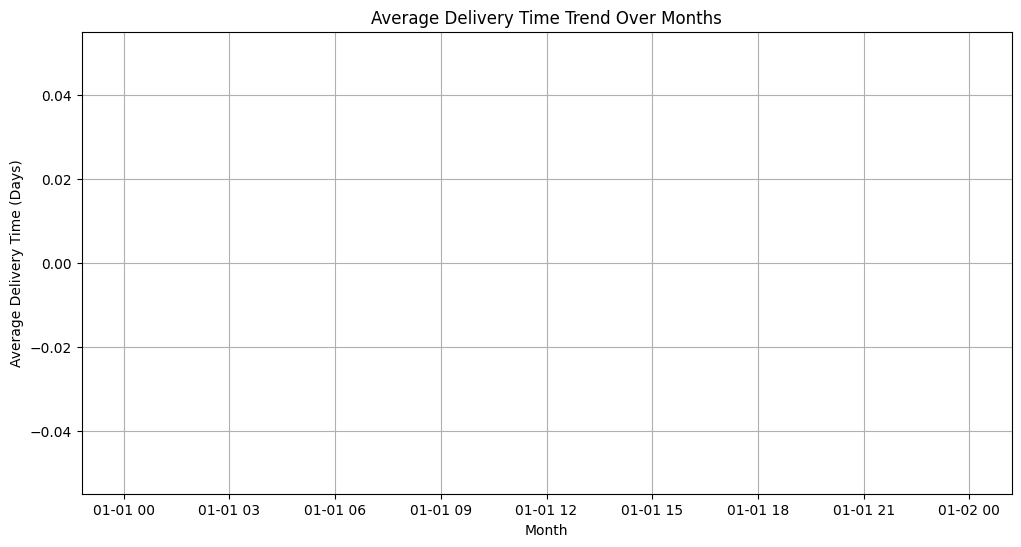

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average delivery time by month
delivery_times_df['ShippedMonth'] = delivery_times_df['ShippedDate'].dt.to_period('M')
average_delivery_time = delivery_times_df.groupby('ShippedMonth')['DeliveryTimeDays'].mean()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_delivery_time.index.to_timestamp(), y=average_delivery_time.values)
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (Days)')
plt.title('Average Delivery Time Trend Over Months')
plt.grid(True)
plt.show()

# Sales Forecasting: Use time series analysis to forecast future sales and identify potential growth opportunities

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# 1. Load your data
import sqlite3 # Import the sqlite3 module to interact with the database
conn = sqlite3.connect("/content/drive/MyDrive/capstone/northwind database.db") # Connect to the database
orders_df = pd.read_sql_query("SELECT * FROM Orders", conn)
products_df = pd.read_sql_query("SELECT * FROM Products", conn)
suppliers_df = pd.read_sql_query("SELECT * FROM Suppliers", conn)
custormers_df = pd.read_sql_query("SELECT * FROM Customers", conn) # Use 'conn' instead of 'COnn'
Employees_df = pd.read_sql_query("SELECT * FROM Employees", conn)  # Use 'conn' instead of 'Conn'# Load data from SQL database
import sqlite3

In [10]:
conn = sqlite3.connect("/content/drive/MyDrive/capstone/northwind database.db")
cursor = conn.cursor()

cursor.execute('''
    SELECT
        o.OrderDate,
        o.Freight
    FROM
        Orders o
''')

data = cursor.fetchall()

In [12]:
# Convert data to Pandas DataFrame
df = pd.DataFrame(data, columns=['OrderDate', 'Freight'])

# Convert OrderDate to datetime format, handling mixed formats
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='mixed') # Tell pandas to infer format for each element

# Resample data to monthly frequency
df_monthly = df.resample('M', on='OrderDate').sum()

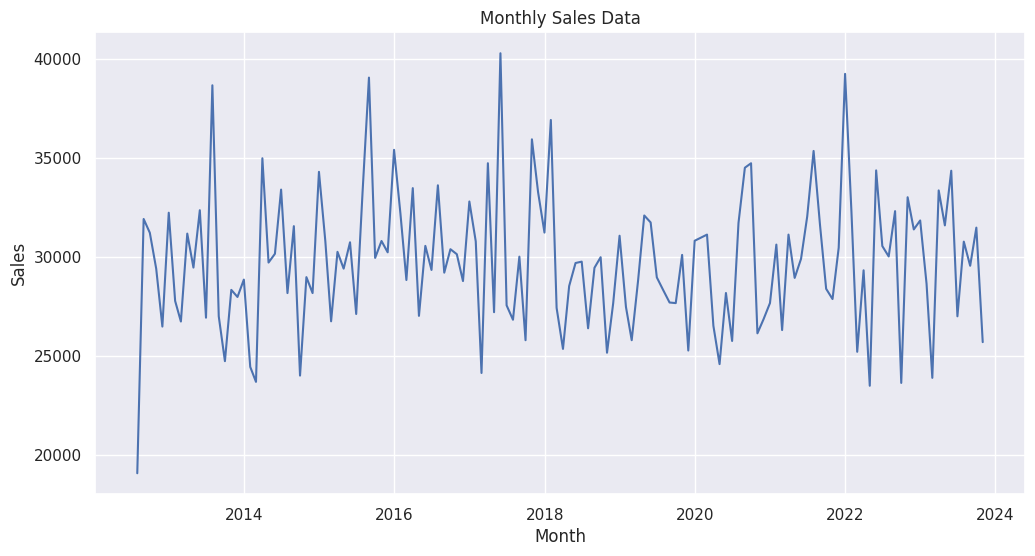

In [13]:

# Plot monthly sales data
sns.set()
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_monthly.index, y=df_monthly['Freight'])
plt.title('Monthly Sales Data')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [14]:
# Split data into training and testing sets
train_df, test_df = train_test_split(df_monthly, test_size=0.2, random_state=42)

# Train a simple random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_df.index.values.reshape(-1, 1), train_df['Freight'])


RandomForestRegressor(random_state=42)

Mean Squared Error: 19533332.72


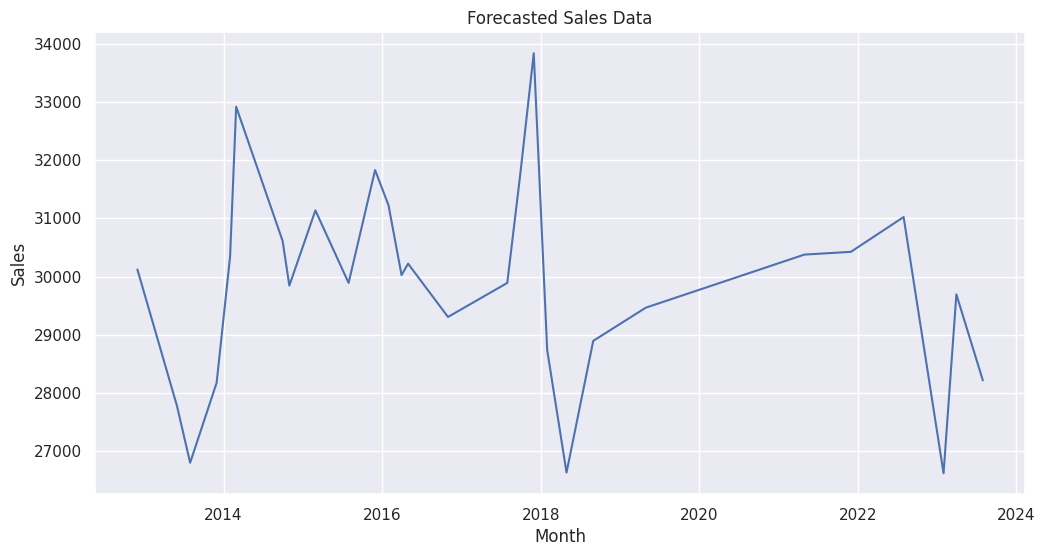

In [16]:
# Make predictions on test data
predictions = model.predict(test_df.index.values.reshape(-1, 1))

# Evaluate model performance
mse = mean_squared_error(test_df['Freight'], predictions)
print(f'Mean Squared Error: {mse:.2f}')
# Plot forecasted sales data
forecast_df = pd.DataFrame({'Month': test_df.index, 'Forecasted Sales': predictions})
sns.set()
plt.figure(figsize=(12, 6))
sns.lineplot(x=forecast_df['Month'], y=forecast_df['Forecasted Sales'])
plt.title('Forecasted Sales Data')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# Profitability Analysis: Analyze the profitability of different product lines and customer segments, and provide recommendations for improving margins.



In [21]:
# Load data from SQL database
conn = sqlite3.connect("/content/drive/MyDrive/capstone/northwind database.db")  # Connect to the database
cursor = conn.cursor()  # Get a cursor object from the connection

cursor.execute('''
    SELECT
        p.ProductName,
        p.CategoryID,
        o.OrderID,
        o.OrderDate,
        o.Freight,
        c.CustomerID,
        c.CompanyName,
        c.Country
    FROM
        Orders o
    JOIN
        Products p ON p.ProductID = p.ProductID
    JOIN
        Customers c ON o.CustomerID = c.CustomerID
''')

data = cursor.fetchall()

In [22]:
# Convert data to Pandas DataFrame
df = pd.DataFrame(data, columns=['ProductName', 'CategoryID', 'OrderID', 'OrderDate', 'Freight', 'CustomerID', 'CompanyName', 'Country'])

# Calculate profit margin for each product line
df['ProfitMargin'] = df['Freight'] * 0.2  # assume 20% profit margin

# Group by product line and calculate average profit margin
product_profitability = df.groupby('ProductName')['ProfitMargin'].mean().reset_index()

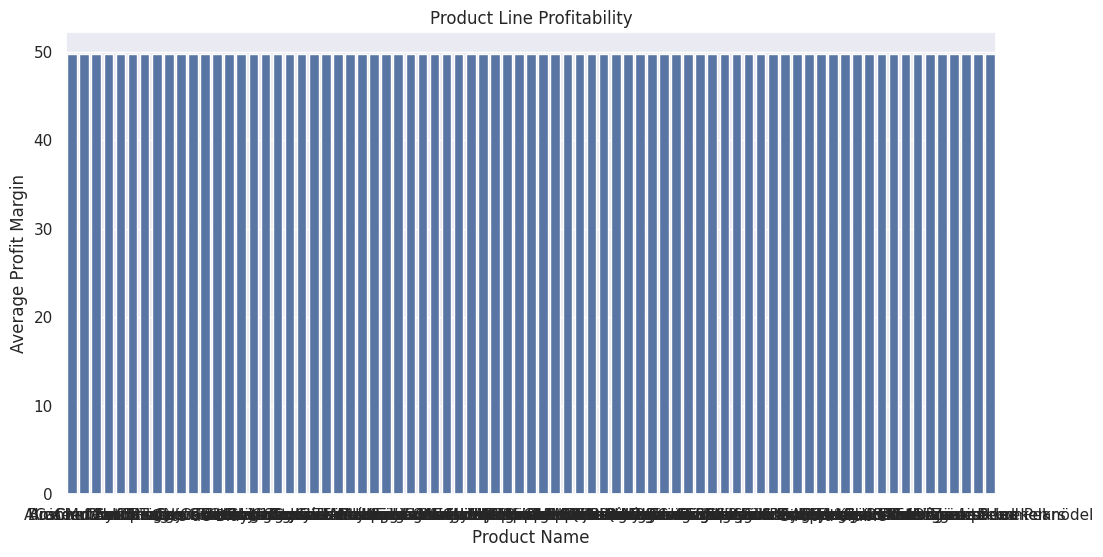

In [23]:
# Plot product line profitability
sns.set()
plt.figure(figsize=(12, 6))
sns.barplot(x=product_profitability['ProductName'], y=product_profitability['ProfitMargin'])
plt.title('Product Line Profitability')
plt.xlabel('Product Name')
plt.ylabel('Average Profit Margin')
plt.show()

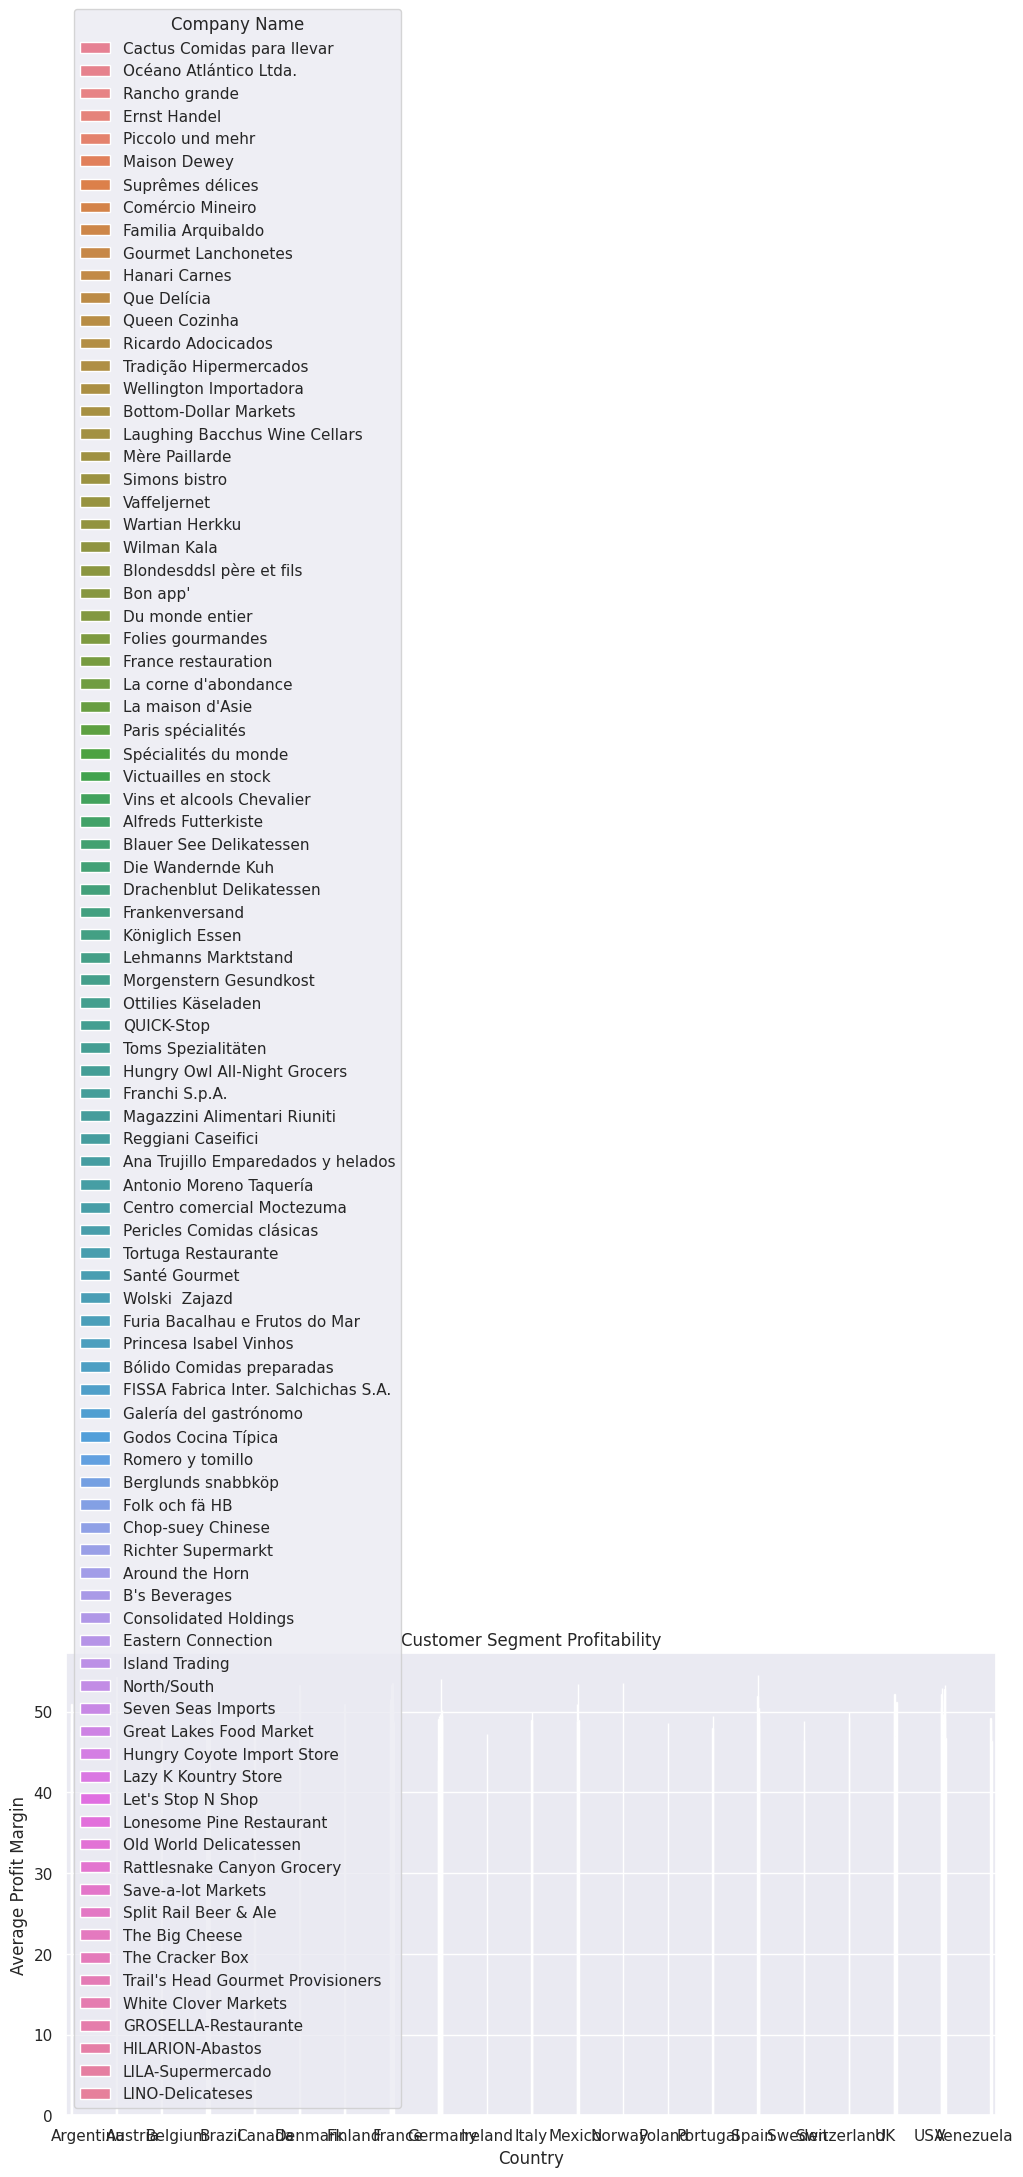

In [24]:

# Group by customer segment and calculate average profit margin
customer_profitability = df.groupby(['Country', 'CompanyName'])['ProfitMargin'].mean().reset_index()

# Plot customer segment profitability
sns.set()
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_profitability['Country'], y=customer_profitability['ProfitMargin'], hue=customer_profitability['CompanyName'])
plt.title('Customer Segment Profitability')
plt.xlabel('Country')
plt.ylabel('Average Profit Margin')
plt.legend(title='Company Name')
plt.show()

In [25]:
# Recommendations for improving margins:

# 1. Focus on high-margin product lines: Identify top 3 product lines with highest average profit margin and prioritize production and marketing efforts.
top_products = product_profitability.nlargest(3, 'ProfitMargin')
print(f'Top 3 high-margin product lines: {top_products["ProductName"].tolist()}')

# 2. Target high-margin customer segments: Identify top 3 customer segments with highest average profit margin and tailor marketing efforts to these segments.
top_customers = customer_profitability.nlargest(3, 'ProfitMargin')
print(f'Top 3 high-margin customer segments: {top_customers["Country"].tolist()} - {top_customers["CompanyName"].tolist()}')

# 3. Optimize pricing and inventory management: Analyze pricing and inventory levels for low-margin product lines and customer segments to identify opportunities for improvement.
low_margin_products = product_profitability.nsmallest(3, 'ProfitMargin')
print(f'Low-margin product lines: {low_margin_products["ProductName"].tolist()}')

low_margin_customers = customer_profitability.nsmallest(3, 'ProfitMargin')
print(f'Low-margin customer segments: {low_margin_customers["Country"].tolist()} - {low_margin_customers["CompanyName"].tolist()}')

Top 3 high-margin product lines: ['Alice Mutton', 'Aniseed Syrup', 'Boston Crab Meat']
Top 3 high-margin customer segments: ['Spain', 'Austria', 'Germany'] - ['FISSA Fabrica Inter. Salchichas S.A.', 'Piccolo und mehr', 'Morgenstern Gesundkost']
Low-margin product lines: ['Alice Mutton', 'Aniseed Syrup', 'Boston Crab Meat']
Low-margin customer segments: ['USA', 'Austria', 'Germany'] - ['Save-a-lot Markets', 'Ernst Handel', 'Alfreds Futterkiste']
